In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
al=pd.read_csv("../Ubuntu_files/Epoch_Hackathon/Dataset.csv")
# Train:test ratio = 80:20
# Therefore, I am taking 1280 training data and 319 test data
# Here we are going to take index 960 to 1279 as test data and rest as training data
x1=pd.concat([al[:640],al[959:]])

In [5]:
x1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,k_value,l_value,m_value,percentage_free_sulphur,n_value
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,8.100,4.0500,0.636,30.909091,0.6080
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,8.680,4.3400,0.778,26.800000,0.8290
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,8.560,4.2800,0.742,36.000000,0.7440
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,11.480,5.7400,0.655,35.294118,0.7195
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,8.100,4.0500,0.636,30.909091,0.6080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,6.800,3.4000,0.670,13.750000,0.6610
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,6.450,3.2250,0.822,13.076923,0.7110
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,6.810,3.4050,0.826,13.793103,0.7540
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,6.545,3.2725,0.785,13.750000,0.6615


In [6]:
# Dropping k_value, l_value, m_value, n_value features of training data
x2=x1.drop(['k_value','l_value','m_value','n_value'],axis=1)

# Extracting quality of training data in numpy array "y"
y1=x2['quality']
y2=y1.to_numpy()
y=y2.reshape(1280,1)

# Removing quality from training data
x=x2.drop('quality',axis=1).to_numpy() 

# Test data from file
te1=al[960:1279]    

# Extracting quality of test data in numpy array "teans"
teans1=te1['quality']   
teans2=teans1.to_numpy()
teans=teans2.reshape(319,1)

# Since 'quality','k_value','l_value','m_value','n_value' are removed from training data, removing it from
# test data
te=te1.drop(['quality','k_value','l_value','m_value','n_value'],axis=1).to_numpy()

In [7]:
# Removing outliers from training data
temp1=np.percentile(x,1,axis=0)
temp99=np.percentile(x,99,axis=0)
c1=0
for col in range(12):
    p_1=temp1[col]
    p_99=temp99[col]
    for i in range(1280):
        if x[i][col]>p_99:
            x=np.delete(x,i,axis=0)
            y=np.delete(y,i,axis=0)
            c1+=1
        elif x[i][col]<p_1:
            x=np.delete(x,i,axis=0)
            y=np.delete(y,i,axis=0)
            c1+=1
        if (i==1279-c1):
            break

In [4]:
# Normalization of training data along with test data
n_row=x.shape[0]
for col in range(12):
    min_col=np.Infinity
    max_col=(-1)*np.Infinity
    for row in range(n_row):
        temp1=x[row][col]
        if (temp1>max_col):
            max_col=temp1
        elif (temp1<min_col):
            min_col=temp1
    x[:,col]=(x[:,col]-min_col)/(max_col-min_col)
    te[:,col]=(te[:,col]-min_col)/(max_col-min_col)

In [8]:
x.shape

(1113, 12)

In [14]:
x_pl=x[:,:1]

In [15]:
x_pl.shape

(1113, 1)

In [16]:
y_pl=y

In [26]:
import matplotlib.pyplot as plt
import scipy.interpolate
x1=x_pl[:,:1]
x2=x_pl[:,1:2]

fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, zi,cmap=plt.get_cmap('jet'))
cbar=fig.colorbar(cp)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.show()

ValueError: invalid shape for input data points

TypeError: Input z must be at least a (2, 2) shaped array, but has shape (1113, 1)

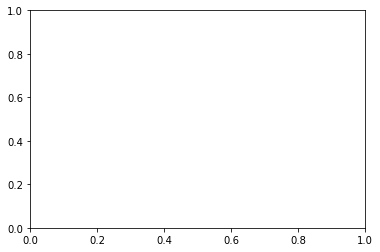

In [12]:
import matplotlib.pyplot as plt
import scipy.interpolate
x1=x_pl[:,:1]
plt.contour(x1,x2,y)

In [ ]:
X,Y=np.meshgrid(x,y)
from matplotlib import cm
fig,ax =plt.subplots(subplot_kw={"projection":"3d"})
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
surf=ax.
# ax.view_init(30,30)
plt.con

In [28]:
plt.contour?

In [29]:
plt.scatter?

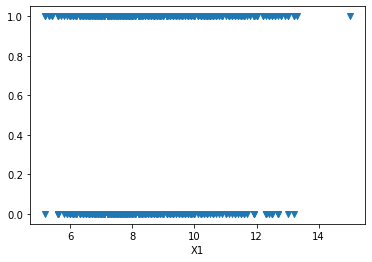

In [17]:
# x1=x_pl[:,:1]
plt.scatter(x_pl, y_pl,marker='v')
plt.xlabel("X1")
# plt.scatter(x2, y_pl,marker='^')
# plt.ylabel("X2")
plt.show()

In [42]:
def j_th(θ,x,y):
    """
    return the cost function for newton's algorithm
    ===============================================
    return type - float64
    """
    import numpy as np
    m=x.shape[0]    # Number of training data
    n=x.shape[1]-1  # Number of features
    temp=1.0/(1+np.exp(-1*(x@θ)))
    out=(y*(np.log(temp))+(1-y)*(np.log(1-temp)))
    s=float(np.sum(out))
    return(-1*s/m)


def newton_method(x,y):
    """
    return the array of required parameters for classification problem
    ==================================================================
    """
    EPS=1.0e-12    #Convergence limit 
    m=x.shape[0]
    n=x.shape[1]-1
    θ=np.zeros(n+1)
    θ=θ.reshape(n+1,1)
    conv=np.Infinity
    j0=j_th(θ,x,y)
    it=0
    while abs(conv)>EPS:
        it+=1
        temp1=1.0/(1.0+np.exp(-1*x@θ))
        H=((np.transpose(x))@((temp1)*(1-temp1)*x))
        H=H/m
        dJ=np.sum(((temp1-y)*x/m),axis=0)
        dJ=dJ.reshape(n+1,1)
        temp2=(np.linalg.pinv(H))@dJ
        θ=θ-temp2
        j1=j_th(θ,x,y)
        conv=j1-j0
        j0=j1
    return θ

In [43]:
θ_sol=newton_method(x_pl,y_pl)

In [44]:
θ_sol

array([[ 0.19136154],
       [-2.67592704]])

In [45]:
te_pl=te[:,:2]
teans_pl=teans

In [46]:
te_pl

array([[ 8.5  ,  0.47 ],
       [ 7.1  ,  0.56 ],
       [ 6.6  ,  0.57 ],
       [ 8.8  ,  0.27 ],
       [ 8.5  ,  0.47 ],
       [ 8.3  ,  0.34 ],
       [ 9.   ,  0.38 ],
       [ 8.5  ,  0.66 ],
       [ 9.   ,  0.4  ],
       [ 6.7  ,  0.56 ],
       [10.4  ,  0.26 ],
       [10.4  ,  0.26 ],
       [10.1  ,  0.38 ],
       [ 8.5  ,  0.34 ],
       [ 8.8  ,  0.33 ],
       [ 7.2  ,  0.41 ],
       [ 7.2  ,  0.41 ],
       [ 8.4  ,  0.59 ],
       [ 7.   ,  0.4  ],
       [12.2  ,  0.45 ],
       [ 9.1  ,  0.5  ],
       [ 9.5  ,  0.86 ],
       [ 7.3  ,  0.52 ],
       [ 9.1  ,  0.5  ],
       [12.2  ,  0.45 ],
       [ 7.4  ,  0.58 ],
       [ 9.8  ,  0.34 ],
       [ 7.1  ,  0.36 ],
       [ 7.7  ,  0.39 ],
       [ 9.7  ,  0.295],
       [ 7.7  ,  0.39 ],
       [ 7.1  ,  0.34 ],
       [ 6.5  ,  0.4  ],
       [ 7.1  ,  0.34 ],
       [10.   ,  0.35 ],
       [ 7.7  ,  0.6  ],
       [ 5.6  ,  0.66 ],
       [ 5.6  ,  0.66 ],
       [ 8.9  ,  0.84 ],
       [ 6.4  ,  0.69 ],


In [2]:
import matplotlib.pyplot as plt
import scipy.interpolate
plt.scatter?